# 文字探勘-金庸小說
### 一、天龍八部角色關係
### 二、詞頻分析

## 一、天龍八部角色關係
以前在看這部小說的時候覺得劇情很扯，主角之一的段譽喜歡上的每個女人到最後竟然都是自己的妹妹，因此我想藉由共現圖來觀察他們之間的關係是不是符合小說情節。

In [14]:
import pandas as pd
import jieba
import matplotlib.pyplot as plt
import numpy as np
import pickle
import seaborn as sns
import networkx as nx

讀進預先爬好的小說文本

In [15]:
with open('1.pkl', 'rb') as f:
    all_novel = pickle.load(f)
all_novel=pd.DataFrame.from_dict(all_novel)
all_novel.head()

,novel,text,title
0,天龙八部,\r\n\t\t 青光闪动，一柄青钢剑倏地刺出，指向在年汉子左肩，使剑少年不等招用老，腕抖...,金庸作品集-第一章 青衫磊落险峰行-金庸-都市小说
1,天龙八部,\r\n\t\t 折腾了这久，月亮已渐到中天，段誉迳向西行，他虽不会武功，但年轻力壮，脚下...,金庸作品集-第二章 玉壁月华明-金庸-都市小说
2,天龙八部,\r\n\t\t 段誉回过头来，只见一个身穿家人服色的汉子快步走来，便是先前隔着板壁所见的...,金庸作品集-第三章 马疾香幽-金庸-都市小说
3,天龙八部,\r\n\t\t 奔出数里，黑玫瑰走上了一条长岭，山岭渐见崎岖，黑玫瑰行得更加慢了，背后呐...,金庸作品集-第四章 崖高人远-金庸-都市小说
4,天龙八部,\r\n\t\t 天色一明，倒为她解开了难题，反正逃不走的了，“这负心郎来也罢，不来也罢，...,金庸作品集-第五章 微步毂纹生-金庸-都市小说


以1000字為單位切文章，以便後面分析使用

In [16]:
seg_len=1000   #以1000字為單位切文章
seg_article=list()
for i in range(len(all_novel)):
    seg=[all_novel['text'][i][j:j+seg_len] for j in range(0, len(all_novel['text'][i]), seg_len)]
    for k in range(len(seg)):
        seg_article.append(seg[k])
print(len(seg_article))

1250


手動輸入天龍八部的主要人物

In [17]:
main_chac=['乔峰','虚竹','段誉','阿朱','阿紫','王语嫣','木婉清','钟灵','段正明','段正淳','刀白凤','秦红棉','甘宝宝'
           ,'阮星竹','李青萝','康敏','慕容复','慕容博','鸠摩智','萧远山','无崖子','天山童姥','李秋水','苏星河',
           '丁春秋','段延庆','叶二娘','岳老三','云中鹤','游坦之']
names = {'乔峰':0,'虚竹':0,'段誉':0,'阿朱':0,'阿紫':0,'王语嫣':0,'木婉清':0
         ,'钟灵':0,'段正明':0,'段正淳':0,'刀白凤':0,'秦红棉':0,'甘宝宝':0
           ,'阮星竹':0,'李青萝':0,'康敏':0,'慕容复':0,'慕容博':0,'鸠摩智':0
           ,'萧远山':0,'无崖子':0,'天山童姥':0,'李秋水':0,'苏星河':0,
           '丁春秋':0,'段延庆':0,'叶二娘':0,'岳老三':0,'云中鹤':0,'游坦之':0}
relationships = {}
lineNames = []

匯入自建字典，並對先前分段的文章切詞，製作共現矩陣

In [18]:
jieba.load_userdict("userdict.txt")
count=0
for seg_str in seg_article:
    switch=0
    lineNames.append([])
    cutted_word=jieba.lcut(seg_str) #list string
    for j in cutted_word: 
        for i in range(len(main_chac)):
            if main_chac[i]==j:
                names[main_chac[i]]+=1
                relationships[main_chac[i]] = {}
                if j in lineNames[count]:
                    pass
                else:
                    lineNames[count].append(j)                    
                switch=1
    if switch==0:
        lineNames[count]=None
    count+=1
#print(lineNames)

for line in lineNames:
    try:
        for name1 in line:
            for name2 in line:
                if name1==name2:
                    continue
                if relationships[name1].get(name2) is None:
                    relationships[name1][name2]=1
                else:
                    relationships[name1][name2]+=1
    except:
        pass
#print(relationships)
co_mat = pd.DataFrame.from_dict(relationships)
co_mat.head()

,段誉,天山童姥,钟灵,岳老三,段正淳,甘宝宝,木婉清,叶二娘,云中鹤,秦红棉,...,乔峰,游坦之,萧远山,阿紫,阮星竹,康敏,苏星河,虚竹,无崖子,李秋水
丁春秋,34.0,1.0,1.0,NaN,6.0,NaN,NaN,5.0,2.0,NaN,...,5.0,41.0,NaN,31.0,5.0,NaN,36.0,49.0,5.0,3.0
乔峰,28.0,NaN,NaN,NaN,9.0,NaN,NaN,1.0,4.0,2.0,...,NaN,13.0,1.0,15.0,4.0,NaN,1.0,1.0,NaN,NaN
云中鹤,47.0,NaN,17.0,11.0,28.0,9.0,31.0,36.0,NaN,7.0,...,4.0,2.0,NaN,6.0,2.0,NaN,1.0,7.0,NaN,NaN
刀白凤,20.0,NaN,6.0,1.0,24.0,10.0,13.0,8.0,14.0,16.0,...,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN
叶二娘,37.0,NaN,8.0,7.0,22.0,4.0,23.0,NaN,36.0,5.0,...,1.0,2.0,4.0,4.0,3.0,NaN,4.0,11.0,NaN,NaN


利用共現矩陣製作node和edge

In [6]:
edge_list = [] 
for index, row in co_mat.iterrows():
    i = 0
    for col in row:
        weight = float(col)/175
        edge_list.append((index, co_mat.columns[i], weight))
        i += 1
updated_edge_list = [x for x in edge_list if not x[2] == 0.0]

for i in updated_edge_list:
    if i[0] == i[1]:
        updated_edge_list.remove(i)

node_list = []
for i in main_chac:
    node_list.append((i, names[i]))
for i in node_list:
    if i[1] == 0.0:
        node_list.remove(i)

### 畫共現圖:
#### 1.不同顏色node代表人物在文章中的出現頻率，紅色是出現頻率最高的人物，次之是綠色，最後是黃色
#### 2.不同粗細、數目edge代表不同共現程度，線段越粗數目越多代表兩個人的共現性越高
#### 3.node間的距離我是用networkx.spring_layout()跑出來的，跟共現性比較沒關係

C:\Users\Vg6\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


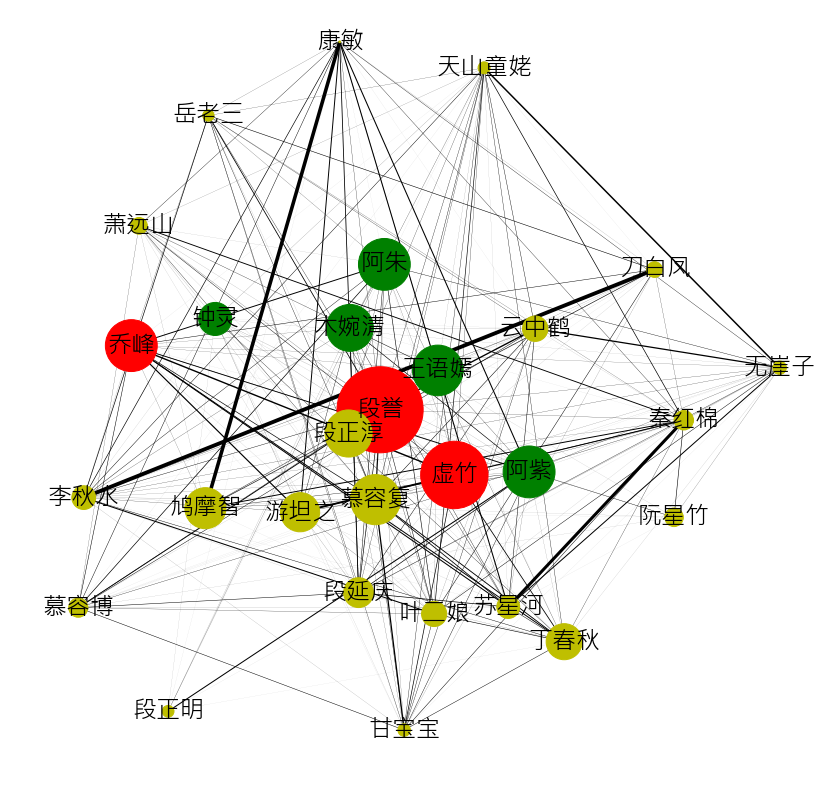

In [8]:
plt.subplots(figsize=(14,14))
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei']
G = nx.Graph()
for i in (node_list):
    G.add_node(i[0], size = i[1])

G.add_weighted_edges_from(updated_edge_list)


node_scalar = 3
edge_scalar = 5
sizes=[]
for i in range(len(node_list)):
    sizes.append(node_list[i][1]*node_scalar)
widths=[]
for i in range(len(updated_edge_list)):
    widths.append(updated_edge_list[i][2]*edge_scalar)
    
pos = nx.spring_layout(G, k=0.42, iterations=17)

color_map=['r','r','r','g','g','g','g','g','y','y','y','y','y','y','y','y',
          'y','y','y','y','y','y','y','y','y','y','y','y','y']

nx.draw(G, pos,with_labels=True, font_size = 24, font_weight = 'bold'
        ,node_color=color_map,node_size = sizes,width=widths)

## 這張圖呈現幾個有趣的結果:
#### 1.三位主角段譽、喬峰、虛竹，在文章中的出現頻率都很高。
#### 2.段譽的愛人(其實是妹妹)出現頻率也很高，和段譽之間的共現性也都很高，比較有趣的是段譽心中最愛的的王語嫣，和段譽之間的共現性是最高的，完全符合小說情節。
#### 3.另外，李秋水<->刀白鳳、蘇星河<->秦紅棉，之間的線非常粗，表示共現程度很高，李秋水和蘇星河都是逍遙派的人，刀白鳳和秦紅棉和段正淳有過一段感情，這中間勢必有劇情的連結，值得探討。
#### 4.喬峰是天龍八部的主角，但node卻沒有很大，推測是因為喬峰有另外一個名字叫"蕭峰"，這可能是出現頻率較低的原因。

## 二、詞頻分析
我想藉由文字雲了解金庸的小說大概都出現什麼字詞


In [1]:
import pickle
import pandas as pd
import numpy
import jieba
from wordcloud import WordCloud
import matplotlib.pyplot as plt

載入停用詞和自訂辭典，自訂辭典包含人名、門派、地名、武功、武器等等專有名詞

In [3]:
def read_stopword(path):
    stopword=[line.strip() for line in open(path,'r',encoding='utf-8').readlines()]
    return stopword

stopword=read_stopword('stopword.txt')

jieba.load_userdict('userdict.txt')

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Vg6\AppData\Local\Temp\jieba.cache
Loading model cost 0.858 seconds.
Prefix dict has been built succesfully.


載入小說文本

In [4]:
with open('Jing_yong_novel.pkl', 'rb') as f:
    all_novel = pickle.load(f)


novel_text=''
for i in range(len(all_novel)):
    novel_text=novel_text+all_novel['text'][i]

切詞，並移除停用詞

In [5]:
cutted_word =jieba.lcut(novel_text)

cutted_word_remove_stopword=list()
for word in cutted_word:
    if word not in stopword:
        cutted_word_remove_stopword.append(word)

為方便後續操作，將切詞存成pandas.DataFrame

In [7]:
c={'Cutted word':cutted_word_remove_stopword}
df=pd.DataFrame(c)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2961035 entries, 0 to 2961034
Data columns (total 1 columns):
Cutted word    object
dtypes: object(1)
memory usage: 22.6+ MB


算出前詞頻前兩百的用字

In [10]:
def generate_freq_list(df):
    cutted_dic={}
    for i in range(0,200):
        cutted_dic[df['Cutted word'].value_counts()[1:201].index[i]]=df['Cutted word'].value_counts()[1:201][i]
        #print(i)
    return cutted_dic
cu=generate_freq_list(df)

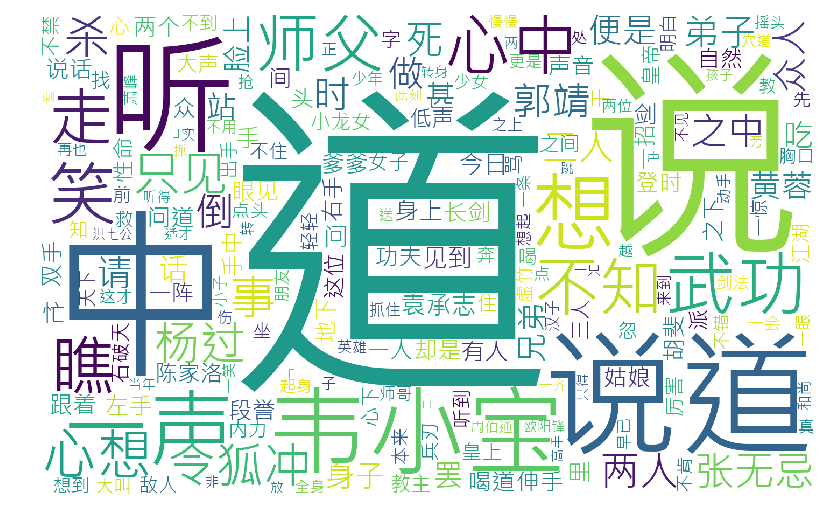

In [11]:
wc = WordCloud(background_color = "white", width = 1440, height = 900, margin= 2,font_path='MicrosoftJhengHeiRegular.ttf')
wc.generate_from_frequencies(cu)
plt.figure(figsize = (10, 10),dpi=100)
plt.imshow(wc)
plt.axis("off")
plt.show()

由文字雲可以看出金庸小說常用字詞，不乏一些膾炙人口的武俠角色，如:韋小寶、楊過、郭靖、張無忌等等......另外就是一些師父、武功等等用字。